# Thesis plots

## Variable Distribution, LASSO Multiple Regression, Multiple Linear regression
### Dependent variables: Radius of Gyration and Depression rate (both logarithmically transformed)

In [1]:
import pandas as pd
import seaborn as sns
from simpledbf import Dbf5
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

Chicago + outer area CBSA zipcode mobility values

In [2]:
dbf = Dbf5('chicago_agg_mobility_TEST.dbf')

df = dbf.to_dataframe()

In [3]:
mob_df = df[['GEOID10', 'cnt', 'rg', 
             'td', 'at', 'dep_rate', 
             'rg_log', 'sv', 'sv_log', 
            'ia', 'ia_log', 'oa', 'oa_log']]

Census Percent Estimate variables (zipcode level)

In [4]:
vars_df = pd.read_csv('Chicago_zcta_subset_acs2019_clean.csv')


Merge census and mobility variables

In [110]:
df.columns

Index(['GEOID10', 'cnt', 'rg', 'td', 'at', 'dep_rate', 'rg_log', 'sv',
       'sv_log', 'ia', 'ia_log', 'oa', 'oa_log', 'GEOID', 'Tract', 'PEWhite',
       'PEBlack', 'PENative', 'PEAsian', 'PEHIPI', 'PEHispanic', 'GiniE',
       'MedincE', 'PEpubasst', 'PEnopubasst', 'PENoCollege', 'PECollege',
       'PEUnder18', 'PE18t24', 'PE25t34', 'PE35t34', 'PE45t54', 'PE55t64',
       'PE65t74', 'PE75over', 'PEFemale', 'PEMale', 'dep_rate_log'],
      dtype='object')

In [5]:
df = mob_df.merge(vars_df, left_on = 'GEOID10', right_on='GEOID')
df

GEOID10  cnt            rg            td            at  dep_rate  \
0      60002    2  71892.421628  5.291788e+04  17088.264370  0.000000   
1      60004    1  29756.006353  5.511973e+03    787.424661  0.000000   
2      60005    3  38287.594755  5.644273e+04  28321.271513  0.000000   
3      60007    2  39283.303382  2.641715e+04  13113.398852  0.000000   
4      60008    1  24411.102073  1.493700e+03   1493.699810  0.000000   
..       ...  ...           ...           ...           ...       ...   
291    61012    1  57310.237868  6.263230e+05  14565.651091  0.000000   
292    61038    1  69926.951956  3.573726e+06  61615.962090  0.000000   
293    61341    5  59905.452212  2.331845e+06  56587.068812  0.000000   
294    61353    1  69155.622226  5.957735e+06  46183.992774  0.000000   
295    61360    3  77633.504750  2.008605e+06  19029.250684  0.333333   

       rg_log      sv    sv_log       ia  ...  PEUnder18   PE18t24   PE25t34  \
0    4.856683  4940.0  3.693727  13663.0  ...   0.231981  0.075318  0.092610   
1    4.473575  3119.0  3.494015  15646.0  ...   0.229843  0.046585  0.112739   
2    4.583058  1231.0  3.090258   6247.0  ...   0.204262  0.051963  0.117225   
3    4.594208  1777.0  3.249687  14603.0  ...   0.184253  0.067760  0.133591   
4    4.387587  3019.0  3.479863  12813.0  ...   0.216867  0.077598  0.176938   
..        ...     ...       ...      ...  ...        ...       ...       ...   
291  4.758232     0.0  0.000000      0.0  ...   0.266827  0.107772  0.122596   
292  4.844645  6884.0  3.837841  12015.0  ...   0.123438  0.185938  0.050781   
293  4.777466     0.0  0.000000      0.0  ...   0.233453  0.053893  0.098597   
294  4.839827   731.0  2.863917   1794.0  ...   0.213266  0.072208  0.130982   
295  4.890049  8367.0  3.922570  18350.0  ...   0.244590  0.104590  0.131148   

      PE35t34   PE45t54   PE55t64   PE65t74  PE75over  PEFemale    PEMale  
0    0.129687  0.158658  0.149846  0.096475  0.065425  0.499834  0.500166  
1    0.132783  0.140544  0.150240  0.098639  0.088627  0.517131  0.482869  
2    0.134911  0.151335  0.141694  0.108381  0.090229  0.490941  0.509059  
3    0.130304  0.142668  0.149242  0.104189  0.087995  0.516450  0.483550  
4    0.118774  0.125883  0.128006  0.076951  0.078983  0.498454  0.501546  
..        ...       ...       ...       ...       ...       ...       ...  
291  0.143029  0.160256  0.099359  0.061298  0.038862  0.489583  0.510417  
292  0.058594  0.195312  0.145313  0.171875  0.068750  0.482031  0.517969  
293  0.137961  0.148268  0.144418  0.093630  0.089780  0.503787  0.496213  
294  0.112510  0.148615  0.145256  0.101595  0.075567  0.527288  0.472712  
295  0.081967  0.138361  0.163279  0.089836  0.046230  0.491148  0.508852  

[296 rows x 37 columns]

#### distribution of the variables, scatterplot matrix and correlation matrix

Removing all modified varibles for initial inspection of relationships

In [6]:
df['dep_rate_log'] = np.log(df['dep_rate'])
df['dep_rate_log'].replace(-np.inf, np.nan, inplace=True)
log_vars = [0] + [2, 5, 6] + list(range(15, 38))

df_raw = df.iloc[:, log_vars]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
df_raw = df_raw[['GEOID10', 'rg', 'rg_log', 'dep_rate', 'dep_rate_log',
       'PEWhite', 'PEBlack', 'PENative', 'PEAsian', 'PEHIPI', 'PEHispanic',
       'GiniE', 'MedincE', 'PEpubasst', 'PEnopubasst', 'PENoCollege',
       'PECollege', 'PEUnder18', 'PE18t24', 'PE25t34', 'PE35t34', 'PE45t54',
       'PE55t64', 'PE65t74', 'PE75over', 'PEFemale', 'PEMale']]
df_raw

GEOID10            rg    rg_log  dep_rate  dep_rate_log   PEWhite  \
0      60002  71892.421628  4.856683  0.000000           NaN  0.865242   
1      60004  29756.006353  4.473575  0.000000           NaN  0.783309   
2      60005  38287.594755  4.583058  0.000000           NaN  0.745803   
3      60007  39283.303382  4.594208  0.000000           NaN  0.751063   
4      60008  24411.102073  4.387587  0.000000           NaN  0.594608   
..       ...           ...       ...       ...           ...       ...   
291    61012  57310.237868  4.758232  0.000000           NaN  0.709936   
292    61038  69926.951956  4.844645  0.000000           NaN  0.871094   
293    61341  59905.452212  4.777466  0.000000           NaN  0.956662   
294    61353  69155.622226  4.839827  0.000000           NaN  0.942905   
295    61360  77633.504750  4.890049  0.333333     -1.098612  0.947541   

      PEBlack  PENative   PEAsian    PEHIPI  ...  PEUnder18   PE18t24  \
0    0.021116  0.000208  0.014091  0.000000  ...   0.231981  0.075318   
1    0.009933  0.000434  0.100417  0.000000  ...   0.229843  0.046585   
2    0.027860  0.000000  0.093786  0.000000  ...   0.204262  0.051963   
3    0.016073  0.000422  0.095323  0.000000  ...   0.184253  0.067760   
4    0.043115  0.000000  0.072105  0.000185  ...   0.216867  0.077598   
..        ...       ...       ...       ...  ...        ...       ...   
291  0.000401  0.000000  0.000000  0.000000  ...   0.266827  0.107772   
292  0.000000  0.000000  0.000000  0.000000  ...   0.123438  0.185938   
293  0.001863  0.000000  0.002608  0.000000  ...   0.233453  0.053893   
294  0.000000  0.000000  0.002519  0.000000  ...   0.213266  0.072208   
295  0.002623  0.000000  0.000000  0.000000  ...   0.244590  0.104590   

      PE25t34   PE35t34   PE45t54   PE55t64   PE65t74  PE75over  PEFemale  \
0    0.092610  0.129687  0.158658  0.149846  0.096475  0.065425  0.499834   
1    0.112739  0.132783  0.140544  0.150240  0.098639  0.088627  0.517131   
2    0.117225  0.134911  0.151335  0.141694  0.108381  0.090229  0.490941   
3    0.133591  0.130304  0.142668  0.149242  0.104189  0.087995  0.516450   
4    0.176938  0.118774  0.125883  0.128006  0.076951  0.078983  0.498454   
..        ...       ...       ...       ...       ...       ...       ...   
291  0.122596  0.143029  0.160256  0.099359  0.061298  0.038862  0.489583   
292  0.050781  0.058594  0.195312  0.145313  0.171875  0.068750  0.482031   
293  0.098597  0.137961  0.148268  0.144418  0.093630  0.089780  0.503787   
294  0.130982  0.112510  0.148615  0.145256  0.101595  0.075567  0.527288   
295  0.131148  0.081967  0.138361  0.163279  0.089836  0.046230  0.491148   

       PEMale  
0    0.500166  
1    0.482869  
2    0.509059  
3    0.483550  
4    0.501546  
..        ...  
291  0.510417  
292  0.517969  
293  0.496213  
294  0.472712  
295  0.508852  

[296 rows x 27 columns]

Subsetting census variables to enable individual examination of each socio-demographic factor

In [8]:
df_raw.columns

Index(['GEOID10', 'rg', 'rg_log', 'dep_rate', 'dep_rate_log', 'PEWhite',
       'PEBlack', 'PENative', 'PEAsian', 'PEHIPI', 'PEHispanic', 'GiniE',
       'MedincE', 'PEpubasst', 'PEnopubasst', 'PENoCollege', 'PECollege',
       'PEUnder18', 'PE18t24', 'PE25t34', 'PE35t34', 'PE45t54', 'PE55t64',
       'PE65t74', 'PE75over', 'PEFemale', 'PEMale'],
      dtype='object')

In [9]:
mob_vars = list(range(1,5))
race_vars = list(range(5,11))
edu_vars = list(range(15,17))
inc_vars = list(range(11,15))
age_vars = list(range(17,25))
gender_vars = list(range(25,27))

Preliminary examination for the distribution of all variables (sociodemographic, mobility, and depression)

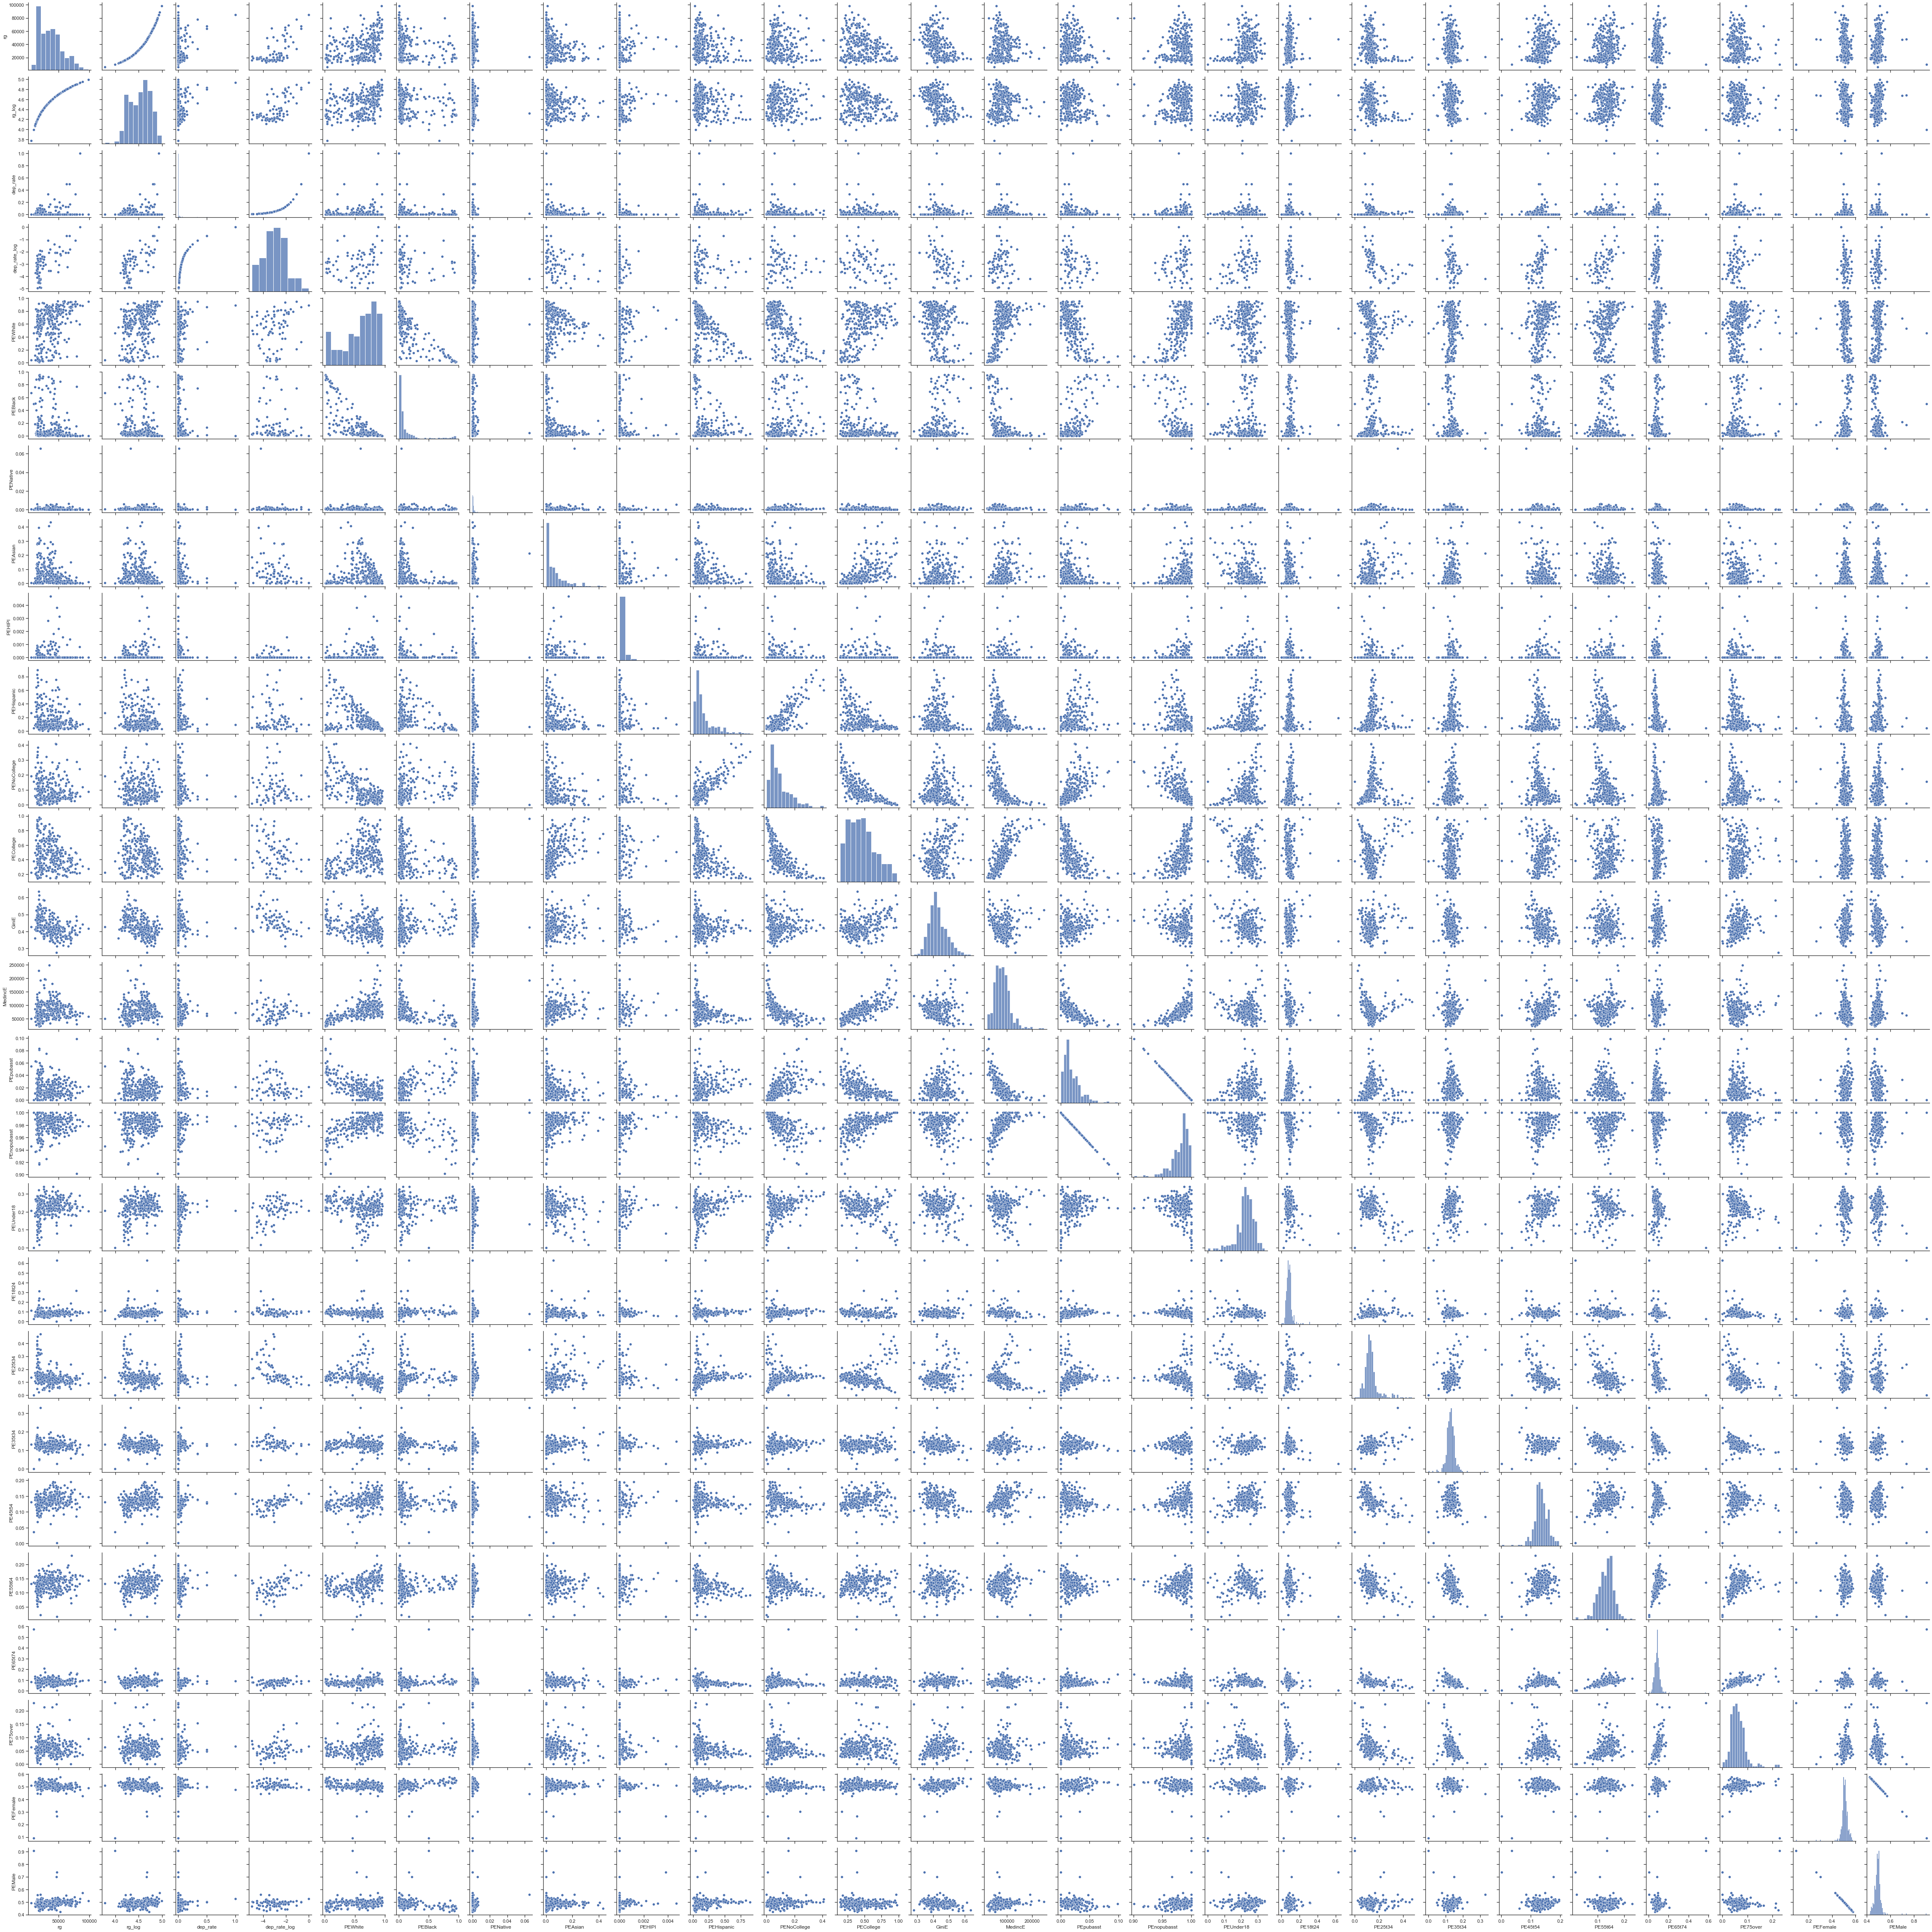

In [10]:
sns.set_theme(style="ticks")

sns.pairplot(df_raw.iloc[:, mob_vars + race_vars + edu_vars + inc_vars + age_vars + gender_vars])
plt.savefig('scatter_mat.png')

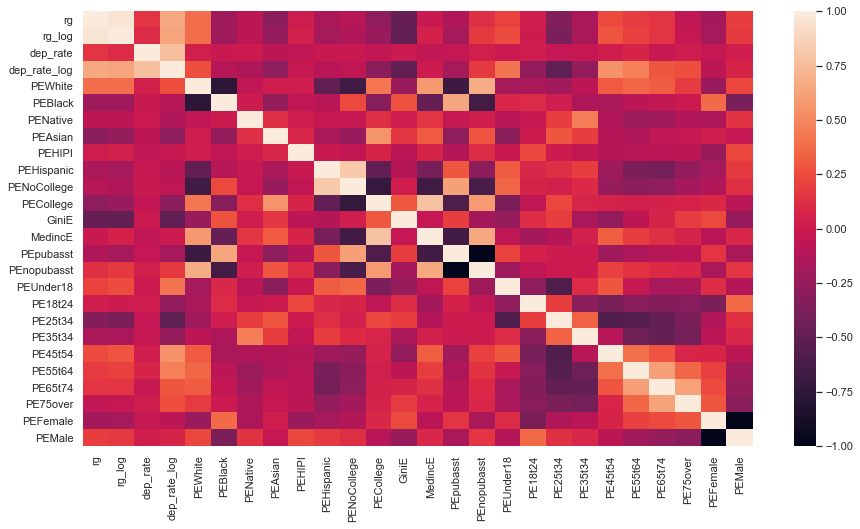

In [138]:
# only rg and depression
edit_vars = mob_vars + race_vars
corrMatrix = df_raw.iloc[:, mob_vars + race_vars + edu_vars + inc_vars + age_vars + gender_vars].corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corrMatrix)
plt.savefig('corr_matrix.png')
plt.show()

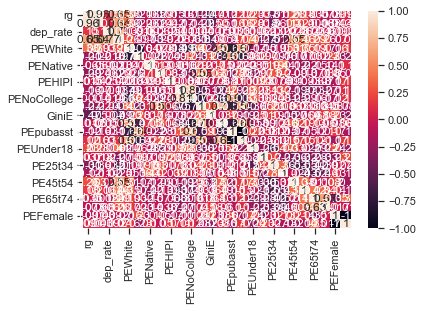

In [12]:
# only rg and depression
edit_vars = mob_vars + race_vars
corrMatrix = df_raw.iloc[:, mob_vars + race_vars + edu_vars + inc_vars + age_vars + gender_vars].corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig('corr_matrix.png')
plt.show()

### Model building, (dependent variable = log(rg))

In [139]:
print(df_raw.shape)
df_raw.dropna(subset= ['PEWhite','PEBlack', 'PENative', 'PEAsian',
                       'PEHIPI', 'PEHispanic', 'GiniE','MedincE', 'PEpubasst', 
                       'PEnopubasst', 'PENoCollege', 'PECollege','PEUnder18', 
                       'PE18t24', 'PE25t34', 'PE35t34', 'PE45t54', 'PE55t64',
                       'PE65t74', 'PE75over', 'PEFemale', 'PEMale'], inplace=True)
print(df_raw.shape)

(295, 27)
(295, 27)


Building model on entire dataset in order to ensure consideration of all spatial locations (acknowledge there is overfit)

In [140]:
X = df_raw.iloc[:,5:]
y =  df_raw['rg_log']

Standardize all variables (Income vars are not percent estimates, rg is in kilometers)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()
X_transform = scaler.fit_transform(X)
y_transform = scaler_y.fit_transform(np.asarray(y).reshape(-1, 1))

X_transform = pd.DataFrame(X_transform, columns=X.columns)

In [114]:
# using statsmodel package to perform Lasso regression (no adjustment to parameters = lasso)
X_const=sm.add_constant(X_transform)        #to add constant value in the model
model= sm.OLS(y_transform,X_const).fit_regularized(refit=True)         #fitting the model
predictions= model.summary()      #summary of the model
predictions

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     15.34
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           3.99e-34
Time:                        10:53:45   Log-Likelihood:                -308.06
No. Observations:                 295   AIC:                             658.1
Df Residuals:                     275   BIC:                             735.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const                0          0        nan        nan           0           0
PEWhite        -0.7775      1.251     -0.621      0.535      -3.240       1.685
PEBlack        -1.0731      1.142     -0.940      0.348      -3.321       1.174
PENative        0.0842      0.053      1.582      0.115      -0.021       0.189
PEAsian        -0.3300      0.385     -0.858      0.392      -1.087       0.427
PEHIPI         -0.0145      0.045     -0.322      0.748      -0.103       0.074
PEHispanic     -1.0849      0.803     -1.351      0.178      -2.666       0.496
GiniE          -0.2936      0.064     -4.614      0.000      -0.419      -0.168
MedincE         0.0094      0.110      0.086      0.932      -0.207       0.225
PEpubasst      -0.1020      0.073     -1.388      0.166      -0.247       0.043
PEnopubasst          0          0        nan        nan           0           0
PENoCollege     0.1262      0.127      0.993      0.322      -0.124       0.376
PECollege      -0.3742      0.146     -2.558      0.011      -0.662      -0.086
PEUnder18       0.2181      0.052      4.225      0.000       0.116       0.320
PE18t24         0.0607      0.051      1.182      0.238      -0.040       0.162
PE25t34        -0.0452      0.048     -0.949      0.343      -0.139       0.049
PE35t34        -0.2206      0.067     -3.302      0.001      -0.352      -0.089
PE45t54        -0.0036      0.054     -0.066      0.947      -0.110       0.103
PE55t64        -0.0901      0.058     -1.566      0.119      -0.203       0.023
PE65t74         0.0446      0.067      0.669      0.504      -0.087       0.176
PE75over       -0.1382      0.055     -2.522      0.012      -0.246      -0.030
PEFemale        0.0311      0.062      0.504      0.614      -0.090       0.152
PEMale               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       13.427   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.507
Skew:                          -0.458   Prob(JB):                     0.000708
Kurtosis:                       3.585   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -9.83e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Lasso regression using GridSearchCV from sklearn

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut # tried with this type of CV, didn't eliminate any vars, 
# so maybe it shouldn't be used? contribute to an already deliberately overfitted model? 
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_reg = Lasso()
reg = GridSearchCV(lasso_reg, parameters, scoring=['r2', 'neg_mean_squared_error'], n_jobs=-1, cv=50, refit='r2')
reg.fit(X_transform, y_transform)

GridSearchCV(cv=50, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [116]:
coef_df = pd.DataFrame({'cols':X_transform.columns, 'coefficents':reg.best_estimator_.coef_})

coef_df.sort_values('coefficents', key=abs, ascending=False)

cols   coefficents
0       PEWhite  3.580109e-01
11    PECollege -3.485718e-01
6         GiniE -2.795734e-01
5    PEHispanic -2.505308e-01
12    PEUnder18  2.437081e-01
15      PE35t34 -1.605629e-01
19     PE75over -8.823359e-02
13      PE18t24  8.229284e-02
2      PENative  7.075066e-02
8     PEpubasst -6.344603e-02
18      PE65t74  3.850307e-02
17      PE55t64 -3.434679e-02
3       PEAsian  5.586940e-03
16      PE45t54  4.994916e-03
9   PEnopubasst  1.880530e-14
10  PENoCollege  0.000000e+00
1       PEBlack -0.000000e+00
14      PE25t34 -0.000000e+00
7       MedincE -0.000000e+00
4        PEHIPI -0.000000e+00
20     PEFemale -0.000000e+00
21       PEMale  0.000000e+00

In [117]:
for key in reg.cv_results_.keys():
    print(key, reg.cv_results_[key][reg.best_index_]) # mean_test_r2 -2.129800232871572

mean_fit_time 0.003535962104797363
std_fit_time 0.0010721301678408895
mean_score_time 0.002760753631591797
std_score_time 0.0007125212694842182
param_alpha 0.01
params {'alpha': 0.01}
split0_test_r2 0.14533002327859357
split1_test_r2 0.2531093355910822
split2_test_r2 -0.271022339493455
split3_test_r2 -0.01547660786910221
split4_test_r2 0.2533035009798895
split5_test_r2 -1.0007388442043168
split6_test_r2 0.5243136595275177
split7_test_r2 -7.02023327231049
split8_test_r2 0.3056473882702786
split9_test_r2 -0.6006013361300457
split10_test_r2 -3.028292312390536
split11_test_r2 0.5758683583740694
split12_test_r2 0.5560213113573861
split13_test_r2 0.33344453555794773
split14_test_r2 -0.3692527974465545
split15_test_r2 -1.133918195638349
split16_test_r2 0.502525063263997
split17_test_r2 -0.49649230750899287
split18_test_r2 0.6966850581371002
split19_test_r2 0.4248658511216896
split20_test_r2 -0.1061605601293043
split21_test_r2 -6.596596089145642
split22_test_r2 -9.634002855073946
split23_test_

* Lasso regression using LassoCV from sklearn

In [142]:
from sklearn.linear_model import LassoCV
from sklearn. pipeline import make_pipeline
lasso_reg = make_pipeline(LassoCV(cv=20)).fit(X_transform, y_transform)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4228188074553998, tolerance: 0.027393628593128824
  model = cd_fast.enet_coordinate_descent_gram(


In [143]:
score = lasso_reg.score(X_transform, y_transform)
score

0.5054807974071684

In [145]:
lasso_reg.named_steps['lassocv'].alpha_

0.0285077212537853

In [120]:
# removes a huge number of vars
coef_df = pd.DataFrame({'cols':X_transform.columns, 'coefficents':lasso_reg.named_steps['lassocv'].coef_})

coef_df.sort_values('coefficents', key=abs, ascending=False)

cols   coefficents
0       PEWhite  3.479660e-01
6         GiniE -2.940128e-01
11    PECollege -2.725376e-01
5    PEHispanic -2.022193e-01
12    PEUnder18  1.994112e-01
15      PE35t34 -1.164098e-01
13      PE18t24  7.559167e-02
19     PE75over -4.424154e-02
2      PENative  3.062274e-02
14      PE25t34 -2.093470e-02
8     PEpubasst -6.545169e-03
9   PEnopubasst  5.226704e-15
16      PE45t54  0.000000e+00
20     PEFemale -0.000000e+00
18      PE65t74  0.000000e+00
17      PE55t64 -0.000000e+00
3       PEAsian -0.000000e+00
4        PEHIPI  0.000000e+00
1       PEBlack -0.000000e+00
10  PENoCollege  0.000000e+00
7       MedincE -0.000000e+00
21       PEMale  0.000000e+00

In [121]:
# P-value calculation
# https://regressors.readthedocs.io/en/latest/usage.html
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from regressors import stats

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(lasso_reg.named_steps['lassocv'], X_transform, y_transform))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(lasso_reg.named_steps['lassocv'], X_transform, y_transform.flatten(), X.columns)

coef_pval:
 [1.00000000e+00 6.79391385e-01 1.00000000e+00 4.83713121e-01
 1.00000000e+00 1.00000000e+00 6.00683344e-01 1.52016449e-07
 1.00000000e+00 9.99999998e-01 1.00000000e+00 1.00000000e+00
 2.92649090e-02 9.99999708e-01 9.99999920e-01 9.99999987e-01
 9.99999443e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999802e-01 1.00000000e+00 1.00000000e+00]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-2.1031 -0.4658 -0.0716  0.4149  2.8896


Coefficients:
             Estimate                  Std. Error             t value   p value
_intercept  -0.000000  4.667900e-02-0.000000e+00j -0.000000-0.000000j  1.000000
PEWhite      0.347966  8.410260e-01+1.082700e-02j  0.413700-0.005300j  0.679391
PEBlack     -0.000000  7.065680e-01+9.713000e-03j  0.000000+0.000000j  1.000000
PENative     0.030623  4.359400e-02+2.576000e-03j  0.700000-0.041400j  0.483713
PEAsian     -0.000000  1.228430e-01-7.300000e-04j -0.000000+0.000000j  1.000000
PEHIPI       0.0

In [55]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=20, random_state=None, shuffle=True)

r2_pred = []
for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    r2_pred.append(lasso_reg.score(X_test, y_test))
    
print(np.mean(r2_pred))

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            283, 284, 285, 286, 287, 289, 290, 291, 292, 293],\n           dtype='int64', length=280)] are in the [columns]"

In [70]:
# Creating new linear model based on the values that were not removed from LASSO 
X_mod = df_raw.loc[:,list(coef_df[abs(coef_df['coefficents']) > 0]['cols'])]
y_mod = df_raw['rg_log']

# re-scaling
scaler = StandardScaler()
scaler_y = StandardScaler()
X_mod_transform = scaler.fit_transform(X_mod)
y_mod_transform = scaler_y.fit_transform(np.asarray(y_mod).reshape(-1, 1))

X_mod_transform = pd.DataFrame(X_mod_transform, columns=X_mod.columns)

X_const=sm.add_constant(X_mod_transform)        #to add constant value in the model
model= sm.OLS(y_mod_transform,X_const).fit_regularized(refit=True)         #fitting the model
predictions= model.summary()      #summary of the model
predictions

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     27.86
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           3.94e-39
Time:                        22:23:14   Log-Likelihood:                -310.62
No. Observations:                 295   AIC:                             645.2
Df Residuals:                     284   BIC:                             689.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const                0          0        nan        nan           0           0
PEWhite         0.3612      0.067      5.394      0.000       0.229       0.493
PENative        0.0921      0.048      1.917      0.056      -0.002       0.187
PEHispanic     -0.2766      0.059     -4.718      0.000      -0.392      -0.161
GiniE          -0.2723      0.054     -5.045      0.000      -0.379      -0.166
PEpubasst      -0.0912      0.070     -1.301      0.194      -0.229       0.047
PEnopubasst          0          0        nan        nan           0           0
PECollege      -0.3835      0.071     -5.408      0.000      -0.523      -0.244
PEUnder18       0.2626      0.078      3.381      0.001       0.110       0.415
PE18t24         0.0860      0.058      1.481      0.140      -0.028       0.200
PE25t34         0.0118      0.078      0.151      0.880      -0.142       0.166
PE35t34        -0.1804      0.063     -2.859      0.005      -0.305      -0.056
PE75over       -0.0917      0.065     -1.417      0.158      -0.219       0.036
==============================================================================
Omnibus:                       13.249   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.574
Skew:                          -0.408   Prob(JB):                     0.000415
Kurtosis:                       3.775   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -1.33e-13. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model building, (dependent variable = log(dep_rate))

In [146]:
dep_df = df_raw.dropna(subset=['dep_rate_log'])

dep_df

GEOID10            rg    rg_log  dep_rate  dep_rate_log   PEWhite  \
8      60018  21728.940122  4.337039  0.007143     -4.941642  0.500383   
11     60025  23192.358221  4.365345  0.142857     -1.945910  0.766386   
12     60030  57017.097069  4.756005  0.142857     -1.945910  0.779266   
22     60047  36707.166430  4.564751  0.166667     -1.791759  0.787810   
36     60071  67785.479674  4.831137  0.500000     -0.693147  0.865132   
..       ...           ...       ...       ...           ...       ...   
279    60827  23949.585381  4.379298  0.033333     -3.401197  0.029772   
281    60914  49654.719924  4.695961  0.025641     -3.663562  0.799846   
282    60915  61644.926804  4.789897  0.125000     -2.079442  0.808718   
290    61008  64378.214957  4.808739  0.038462     -3.258097  0.688876   
295    61360  77633.504750  4.890049  0.333333     -1.098612  0.947541   

      PEBlack  PENative   PEAsian   PEHIPI  ...  PEUnder18   PE18t24  \
8    0.016480  0.000566  0.112994  0.00000  ...   0.225688  0.093352   
11   0.014462  0.000366  0.136338  0.00000  ...   0.250104  0.049005   
12   0.025439  0.001107  0.051266  0.00155  ...   0.210519  0.096775   
22   0.012908  0.000094  0.109839  0.00054  ...   0.249296  0.087847   
36   0.010704  0.002676  0.006155  0.00000  ...   0.230399  0.105432   
..        ...       ...       ...      ...  ...        ...       ...   
279  0.897904  0.001194  0.001369  0.00000  ...   0.288909  0.103079   
281  0.088264  0.000000  0.020438  0.00000  ...   0.214015  0.171125   
282  0.047383  0.000000  0.002140  0.00000  ...   0.238471  0.107025   
290  0.012789  0.000000  0.010844  0.00000  ...   0.248770  0.090850   
295  0.002623  0.000000  0.000000  0.00000  ...   0.244590  0.104590   

      PE25t34   PE35t34   PE45t54   PE55t64   PE65t74  PE75over  PEFemale  \
8    0.129440  0.124580  0.140893  0.132570  0.078670  0.074808  0.498685   
11   0.085746  0.120288  0.138292  0.152730  0.114670  0.089166  0.508709   
12   0.114381  0.119225  0.145301  0.153080  0.087696  0.073024  0.504277   
22   0.089490  0.112467  0.184778  0.150723  0.079962  0.045437  0.500516   
36   0.086165  0.135403  0.130854  0.172331  0.090982  0.048435  0.497993   
..        ...       ...       ...       ...       ...       ...       ...   
279  0.142541  0.122213  0.129200  0.113682  0.068673  0.031703  0.562335   
281  0.122428  0.107226  0.128503  0.122227  0.079639  0.054838  0.528745   
282  0.151683  0.100311  0.122787  0.111889  0.083382  0.084452  0.515956   
290  0.112067  0.121792  0.136467  0.122499  0.100339  0.067217  0.504405   
295  0.131148  0.081967  0.138361  0.163279  0.089836  0.046230  0.491148   

       PEMale  
8    0.501315  
11   0.491291  
12   0.495723  
22   0.499484  
36   0.502007  
..        ...  
279  0.437665  
281  0.471255  
282  0.484044  
290  0.495595  
295  0.508852  

[80 rows x 27 columns]

In [147]:
full_set = [2] + list(range(5, len(df_raw.columns)))

Building model on entire dataset in order to ensure consideration of all spatial locations (acknowledge there is overfit)

In [148]:
X = dep_df.iloc[:,full_set]
y = dep_df['dep_rate_log']

Standardize all variables (Income vars are not percent estimates, rg is in kilometers)

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()
X_transform = scaler.fit_transform(X)
y_transform = scaler_y.fit_transform(np.asarray(y).reshape(-1, 1))

X_transform = pd.DataFrame(X_transform, columns=X.columns)

In [125]:
# using statsmodel package to perform Lasso regression (no adjustment to parameters = lasso)
X_const=sm.add_constant(X_transform)        #to add constant value in the model
model= sm.OLS(y_transform,X_const).fit_regularized(refit=True)         #fitting the model
predictions= model.summary()      #summary of the model
predictions

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     4.632
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.68e-06
Time:                        14:11:30   Log-Likelihood:                -74.551
No. Observations:                  80   AIC:                             193.1
Df Residuals:                      59   BIC:                             245.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const                0          0        nan        nan           0           0
rg_log          0.2425      0.158      1.533      0.131      -0.074       0.559
PEWhite        -3.1716      2.845     -1.115      0.269      -8.864       2.520
PEBlack        -2.7155      2.731     -0.994      0.324      -8.181       2.750
PENative       -0.0960      0.184     -0.522      0.604      -0.464       0.272
PEAsian        -1.0393      0.996     -1.044      0.301      -3.031       0.953
PEHIPI         -0.0075      0.090     -0.084      0.934      -0.187       0.172
PEHispanic     -2.2754      2.139     -1.064      0.292      -6.555       2.004
GiniE          -0.0717      0.173     -0.415      0.680      -0.417       0.274
MedincE         0.0303      0.275      0.110      0.913      -0.521       0.581
PEpubasst      -0.2595      0.204     -1.270      0.209      -0.668       0.149
PEnopubasst          0          0        nan        nan           0           0
PENoCollege    -0.3779      0.298     -1.267      0.210      -0.975       0.219
PECollege      -0.2746      0.434     -0.633      0.529      -1.143       0.594
PEUnder18       0.2892      0.140      2.065      0.043       0.009       0.570
PE18t24        -0.1888      0.114     -1.663      0.102      -0.416       0.038
PE25t34        -0.0436      0.112     -0.390      0.698      -0.267       0.180
PE35t34        -0.2983      0.222     -1.342      0.185      -0.743       0.146
PE45t54         0.0233      0.147      0.158      0.875      -0.271       0.318
PE55t64         0.1395      0.198      0.704      0.484      -0.257       0.536
PE65t74        -0.1714      0.256     -0.670      0.506      -0.684       0.341
PE75over        0.0862      0.163      0.530      0.598      -0.239       0.411
PEFemale       -0.3855      0.155     -2.492      0.016      -0.695      -0.076
PEMale               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       13.699   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.141
Skew:                          -0.728   Prob(JB):                     6.98e-05
Kurtosis:                       4.904   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -1.07e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Lasso regression using GridSearchCV from sklearn

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut # tried with this type of CV, didn't eliminate any vars, 
# so maybe it shouldn't be used? contribute to an already deliberately overfitted model? 
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_reg = Lasso()
reg = GridSearchCV(lasso_reg, parameters, scoring=['r2', 'neg_mean_squared_error'], n_jobs=-1, cv=50, refit='r2')
reg.fit(X_transform, y_transform)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+01, tolerance: 8.000e-03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=50, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [127]:
coef_df = pd.DataFrame({'cols':X_transform.columns, 'coefficents':reg.best_estimator_.coef_})

coef_df.sort_values('coefficents', key=abs, ascending=False)

cols   coefficents
1       PEWhite -1.587135e+00
2       PEBlack -1.196506e+00
6    PEHispanic -1.091753e+00
4       PEAsian -4.886312e-01
21     PEFemale -3.753888e-01
11  PENoCollege -3.524129e-01
16      PE35t34 -3.340611e-01
9     PEpubasst -2.613727e-01
0        rg_log  2.583769e-01
13    PEUnder18  2.558698e-01
14      PE18t24 -2.345301e-01
19      PE65t74 -2.078379e-01
12    PECollege -1.442989e-01
15      PE25t34 -1.205628e-01
18      PE55t64  1.143628e-01
7         GiniE -8.780544e-02
20     PE75over  7.411844e-02
3      PENative -4.464179e-02
8       MedincE -4.101546e-02
17      PE45t54  1.569388e-02
5        PEHIPI -3.766003e-03
10  PEnopubasst  1.941106e-13
22       PEMale  3.219012e-14

In [128]:
for key in reg.cv_results_.keys():
    print(key, reg.cv_results_[key][reg.best_index_]) # mean_test_r2 -2.129800232871572

mean_fit_time 0.01688858985900879
std_fit_time 0.017542840843236884
mean_score_time 0.0047932958602905276
std_score_time 0.0019383835513879118
param_alpha 1e-15
params {'alpha': 1e-15}
split0_test_r2 -0.6088290404944856
split1_test_r2 -26.587316440556048
split2_test_r2 -0.30968879411892725
split3_test_r2 0.6992249756936353
split4_test_r2 -1.425583184012444
split5_test_r2 -1.1316015973180686
split6_test_r2 -2.018965905980843
split7_test_r2 -8.944038399680611
split8_test_r2 -2.4142002998179586
split9_test_r2 -53.57163139290273
split10_test_r2 -0.050406317960379754
split11_test_r2 -0.09314868388841036
split12_test_r2 0.8467895780992872
split13_test_r2 -115858.80730742111
split14_test_r2 0.5438873585131823
split15_test_r2 0.7991758073485061
split16_test_r2 -3.9621693436628185
split17_test_r2 -5606.976124339305
split18_test_r2 -769.197696100273
split19_test_r2 -137.51959794156812
split20_test_r2 -33.20119537366653
split21_test_r2 -0.3956735286703119
split22_test_r2 -2355.9606649806483
split

* Lasso regression using LassoCV from sklearn

In [150]:
from sklearn.linear_model import LassoCV
from sklearn. pipeline import make_pipeline
lasso_reg = make_pipeline(LassoCV(cv=20)).fit(X_transform, y_transform)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01710890491833794, tolerance: 0.007308220640010122
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043520607039745585, tolerance: 0.007308220640010122
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: Convergence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3183180829815839, tolerance: 0.007495439773215664
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029496787265106406, tolerance: 0.00785199433003738
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15179335103626812, tolerance: 0.00785199433003738
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_desce

In [151]:
score = lasso_reg.score(X_transform, y_transform)
score

0.5303879110306366

In [152]:
lasso_reg.named_steps['lassocv'].alpha_

0.07884422461774537

In [131]:
# removes a huge number of vars
coef_df = pd.DataFrame({'cols':X_transform.columns, 'coefficents':lasso_reg.named_steps['lassocv'].coef_})

coef_df.sort_values('coefficents', key=abs, ascending=False)

cols  coefficents
0        rg_log     0.399198
17      PE45t54     0.110088
7         GiniE    -0.097589
13    PEUnder18     0.076652
14      PE18t24    -0.067091
18      PE55t64     0.066452
20     PE75over     0.063980
12    PECollege    -0.000000
21     PEFemale    -0.000000
19      PE65t74     0.000000
16      PE35t34    -0.000000
15      PE25t34    -0.000000
11  PENoCollege    -0.000000
1       PEWhite     0.000000
10  PEnopubasst     0.000000
9     PEpubasst    -0.000000
8       MedincE     0.000000
6    PEHispanic    -0.000000
5        PEHIPI     0.000000
4       PEAsian    -0.000000
3      PENative    -0.000000
2       PEBlack     0.000000
22       PEMale     0.000000

In [132]:
# P-value calculation
# https://regressors.readthedocs.io/en/latest/usage.html
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from regressors import stats

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(lasso_reg.named_steps['lassocv'], X_transform, y_transform))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(lasso_reg.named_steps['lassocv'], X_transform, y_transform.flatten(), X.columns)

coef_pval:
 [1.         0.00368275 1.         1.         1.         1.
 1.         1.         0.48299627 1.         1.         1.
 1.         1.         0.99999996 0.99999991 1.         1.
 0.99999942 0.99999986 1.         0.99999984 1.         1.        ]

=========== SUMMARY ===========
Residuals:
   Min      1Q  Median      3Q     Max
-1.564 -0.4011 -0.0689  0.3729  2.0411


Coefficients:
             Estimate                  Std. Error             t value   p value
_intercept   0.000000  6.819700e-02+0.000000e+00j  0.000000-0.000000j  1.000000
rg_log       0.399198  1.333650e-01+0.000000e+00j  2.993300-0.000000j  0.003683
PEWhite      0.000000  1.762960e+00-0.000000e+00j  0.000000+0.000000j  1.000000
PEBlack      0.000000  1.622206e+00-0.000000e+00j  0.000000+0.000000j  1.000000
PENative    -0.000000  1.241780e-01-0.000000e+00j -0.000000+0.000000j  1.000000
PEAsian     -0.000000  2.959890e-01-0.000000e+00j -0.000000+0.000000j  1.000000
PEHIPI       0.000000  8.255500e-02-0.000000e

In [55]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=20, random_state=None, shuffle=True)

r2_pred = []
for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    r2_pred.append(lasso_reg.score(X_test, y_test))
    
print(np.mean(r2_pred))

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            283, 284, 285, 286, 287, 289, 290, 291, 292, 293],\n           dtype='int64', length=280)] are in the [columns]"

In [133]:
# Creating new linear model based on the values that were not removed from LASSO 
X_mod = dep_df.loc[:,list(coef_df[abs(coef_df['coefficents']) > 0]['cols'])]
y_mod = dep_df['dep_rate_log']

# re-scaling
scaler = StandardScaler()
scaler_y = StandardScaler()
X_mod_transform = scaler.fit_transform(X_mod)
y_mod_transform = scaler_y.fit_transform(np.asarray(y_mod).reshape(-1, 1))

X_mod_transform = pd.DataFrame(X_mod_transform, columns=X_mod.columns)

X_const=sm.add_constant(X_mod_transform)        #to add constant value in the model
model= sm.OLS(y_mod_transform,X_const).fit_regularized(refit=True)         #fitting the model
predictions= model.summary()      #summary of the model
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     12.66
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.61e-10
Time:                        14:16:31   Log-Likelihood:                -81.722
No. Observations:                  80   AIC:                             179.4
Df Residuals:                      73   BIC:                             198.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
rg_log         0.4418      0.109      4.049      0.000       0.224       0.659
GiniE         -0.1379      0.110     -1.252      0.215      -0.357       0.082
PEUnder18      0.1252      0.095      1.322      0.190      -0.063       0.314
PE18t24       -0.1089      0.095     -1.150      0.254      -0.298       0.080
PE45t54        0.0635      0.134      0.473      0.638      -0.204       0.331
PE55t64        0.1071      0.125      0.855      0.395      -0.143       0.357
PE75over       0.1244      0.098      1.264      0.210      -0.072       0.321
==============================================================================
Omnibus:                        7.192   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.559
Skew:                          -0.614   Prob(JB):                       0.0376
Kurtosis:                       3.677   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Creating new linear model based on the values that were not removed from LASSO 
X_mod = dep_df.loc[:,list(coef_df[abs(coef_df['coefficents']) > 0]['cols'])]
X_mod = X_mod[list(X_mod.columns)[1:]]
y_mod = dep_df['dep_rate_log']

# re-scaling
scaler = StandardScaler()
scaler_y = StandardScaler()
X_mod_transform = scaler.fit_transform(X_mod)
y_mod_transform = scaler_y.fit_transform(np.asarray(y_mod).reshape(-1, 1))

X_mod_transform = pd.DataFrame(X_mod_transform, columns=X_mod.columns)

X_const=sm.add_constant(X_mod_transform)        #to add constant value in the model
model= sm.OLS(y_mod_transform,X_const).fit_regularized(refit=True)         #fitting the model
predictions= model.summary()      #summary of the model
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     9.967
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.80e-08
Time:                        12:01:44   Log-Likelihood:                -89.824
No. Observations:                  80   AIC:                             193.6
Df Residuals:                      74   BIC:                             210.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
GiniE         -0.3516      0.106     -3.308      0.001      -0.563      -0.140
PEUnder18      0.1872      0.103      1.823      0.072      -0.017       0.392
PE18t24       -0.0019      0.100     -0.019      0.985      -0.201       0.197
PE45t54        0.0829      0.147      0.562      0.576      -0.211       0.377
PE55t64        0.2748      0.130      2.115      0.038       0.016       0.534
PE75over       0.0865      0.108      0.803      0.425      -0.128       0.301
==============================================================================
Omnibus:                       10.003   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               16.225
Skew:                          -0.437   Prob(JB):                     0.000300
Kurtosis:                       5.025   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
dep_df


GEOID10            rg    rg_log  dep_rate  dep_rate_log   PEWhite  \
8      60018  21728.940122  4.337039  0.007143     -4.941642  0.500383   
11     60025  23192.358221  4.365345  0.142857     -1.945910  0.766386   
12     60030  57017.097069  4.756005  0.142857     -1.945910  0.779266   
22     60047  36707.166430  4.564751  0.166667     -1.791759  0.787810   
36     60071  67785.479674  4.831137  0.500000     -0.693147  0.865132   
..       ...           ...       ...       ...           ...       ...   
279    60827  23949.585381  4.379298  0.033333     -3.401197  0.029772   
281    60914  49654.719924  4.695961  0.025641     -3.663562  0.799846   
282    60915  61644.926804  4.789897  0.125000     -2.079442  0.808718   
290    61008  64378.214957  4.808739  0.038462     -3.258097  0.688876   
295    61360  77633.504750  4.890049  0.333333     -1.098612  0.947541   

      PEBlack  PENative   PEAsian   PEHIPI  ...  PEUnder18   PE18t24  \
8    0.016480  0.000566  0.112994  0.00000  ...   0.225688  0.093352   
11   0.014462  0.000366  0.136338  0.00000  ...   0.250104  0.049005   
12   0.025439  0.001107  0.051266  0.00155  ...   0.210519  0.096775   
22   0.012908  0.000094  0.109839  0.00054  ...   0.249296  0.087847   
36   0.010704  0.002676  0.006155  0.00000  ...   0.230399  0.105432   
..        ...       ...       ...      ...  ...        ...       ...   
279  0.897904  0.001194  0.001369  0.00000  ...   0.288909  0.103079   
281  0.088264  0.000000  0.020438  0.00000  ...   0.214015  0.171125   
282  0.047383  0.000000  0.002140  0.00000  ...   0.238471  0.107025   
290  0.012789  0.000000  0.010844  0.00000  ...   0.248770  0.090850   
295  0.002623  0.000000  0.000000  0.00000  ...   0.244590  0.104590   

      PE25t34   PE35t34   PE45t54   PE55t64   PE65t74  PE75over  PEFemale  \
8    0.129440  0.124580  0.140893  0.132570  0.078670  0.074808  0.498685   
11   0.085746  0.120288  0.138292  0.152730  0.114670  0.089166  0.508709   
12   0.114381  0.119225  0.145301  0.153080  0.087696  0.073024  0.504277   
22   0.089490  0.112467  0.184778  0.150723  0.079962  0.045437  0.500516   
36   0.086165  0.135403  0.130854  0.172331  0.090982  0.048435  0.497993   
..        ...       ...       ...       ...       ...       ...       ...   
279  0.142541  0.122213  0.129200  0.113682  0.068673  0.031703  0.562335   
281  0.122428  0.107226  0.128503  0.122227  0.079639  0.054838  0.528745   
282  0.151683  0.100311  0.122787  0.111889  0.083382  0.084452  0.515956   
290  0.112067  0.121792  0.136467  0.122499  0.100339  0.067217  0.504405   
295  0.131148  0.081967  0.138361  0.163279  0.089836  0.046230  0.491148   

       PEMale  
8    0.501315  
11   0.491291  
12   0.495723  
22   0.499484  
36   0.502007  
..        ...  
279  0.437665  
281  0.471255  
282  0.484044  
290  0.495595  
295  0.508852  

[80 rows x 27 columns]